## Variation in spectrum of the Jacobian of consensus dynamics

We consider the system:

$$\dot{\mathbf{x}} = -D\mathbf{x} + A\mathbf{S}(\mathbf{x}, u); \quad \mathbf{x} \in \mathbb{R}^N, \mathbf{S}:\mathbb{R}^N \times \mathbb{R} \rightarrow \mathbb{R}^N,$$

where $\mathbf{S}(\mathbf{x}, u) := (S(x_i,u))_{i=1,\dots,N}, S:\mathbb{R}^2 \rightarrow \mathbb{R}$.

To analyse stability of the fixed point at the origin, the Jacobian of the above system is:
$$J := -D + kA,$$
where $k := \partial_xS(0,0)$.

In [1]:
%run ../net_sym.py

In [2]:
import matplotlib.pyplot as plt
from network2tikz import plot
import matplotlib2tikz as mplt2tikz

In [3]:
N = 4
g = get_strongly_connected_digraph(N)

In [4]:
node_list = np.arange(0,N)

In [5]:
A = nx.adjacency_matrix(g, nodelist = node_list)
D = np.diag(np.asarray(np.sum(A, axis=1)).reshape(-1))
L = D-A

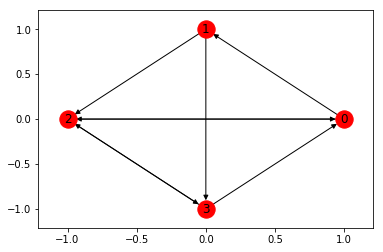

In [6]:
layout_dict = nx.circular_layout(g)
plot(g,"jacobian_ex_net.tex", standalone=False, layout=layout_dict)
nx.draw_networkx(g, pos = layout_dict)

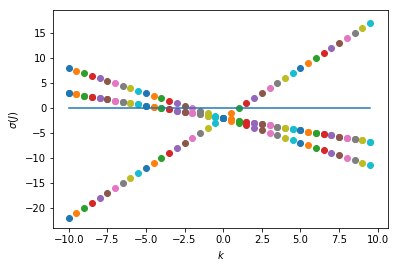

In [7]:
#plt.figure(figsize=(12,8))
energy = np.zeros(40)
i = 0
for k in np.arange(-10,10,0.5):
    val, vec = np.linalg.eig(-D+k*A)
    u,e,v = np.linalg.svd(-D+k*A)
    energy[i] = np.sum(e)
    i = i+1
    plt.scatter(np.repeat(k,N),np.real(val))
    #plt.scatter(np.real(val), np.imag(val))
plt.xlabel(r'$k$')
plt.ylabel(r'$\sigma(J)$')
plt.plot(np.arange(-10,10,0.5),np.repeat(0,40))
mplt2tikz.save("jacobian_plot.tex")
#plt.plot(np.arange(-10,10,0.5), energy)

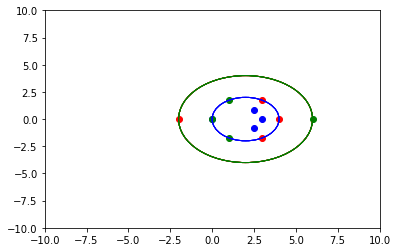

In [8]:
max_d = np.max(D)
k = 1
val, vec = np.linalg.eig(D-k*A)
plt.scatter(np.real(val), np.imag(val), color='blue')
for d in np.diag(D):
    plt.gcf().gca().add_artist(plt.Circle((d,0),k*d,fill=False,color="blue"))

k = 2
val, vec = np.linalg.eig(D-k*A)
plt.scatter(np.real(val), np.imag(val), color='red')
plt.xlim(-10,10)
plt.ylim(-10,10)
for d in np.diag(D):
    plt.gcf().gca().add_artist(plt.Circle((d,0),k*d,fill=False,color="red"))
#plt.gcf().gca().set_aspect('equal', adjustable='datalim')

k = -2
val, vec = np.linalg.eig(D-k*A)
plt.scatter(np.real(val), np.imag(val), color='green')
plt.xlim(-10,10)
plt.ylim(-10,10)
for d in np.diag(D):
    plt.gcf().gca().add_artist(plt.Circle((d,0),k*d,fill=False,color="green"))

In [9]:
np.diag(D)

array([2, 2, 2, 2])